In [39]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

from utils.utils import XyScaler
%matplotlib inline

In [40]:
data = pd.read_csv('merged_data.csv')
data = data.dropna()
data.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [41]:
pd.set_option("display.max_columns", 50)
data.corr()


,Unnamed: 0,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
Unnamed: 0,1.000000,0.996223,NaN,-0.033491,-0.055686,-0.041048,-0.093155,-0.053485,-0.025535,-0.044799,-0.032274,-0.010731,-0.004987,-0.050718,-0.056035,-0.081344,-0.043281,-0.040503,0.002466,0.026464,-0.046807,-0.018619,-0.051768,0.011522,-0.024083,-0.041576,-0.193113,0.074893,-0.142508,-0.057922,-0.054789,-0.054788,-0.014858,-0.014749,-0.185951,-0.098926,-0.053751
county_code,0.996223,1.000000,NaN,-0.033893,-0.053270,-0.038341,-0.087723,-0.053694,-0.027703,-0.044604,-0.030692,-0.009651,-0.004358,-0.047947,-0.056217,-0.081081,-0.042660,-0.040126,0.003446,0.021144,-0.046582,-0.020324,-0.054209,0.005083,-0.027446,-0.040674,-0.193043,0.062764,-0.166287,-0.058086,-0.055031,-0.055030,-0.012414,-0.012321,-0.186364,-0.102965,-0.053454
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMAT_fac,-0.033491,-0.033893,NaN,1.000000,0.595513,0.143392,0.319701,0.693475,0.905213,0.680511,0.701584,0.689784,0.695872,0.620961,0.658636,0.716374,0.752138,0.774309,0.284524,0.089120,0.693021,-0.012223,0.023985,-0.066099,0.473234,0.726229,0.157613,0.000855,-0.009146,0.666668,0.674728,0.674728,0.368826,0.368799,0.044985,-0.046531,0.677861
HIVdiagnoses,-0.055686,-0.053270,NaN,0.595513,1.000000,0.265064,0.434472,0.742972,0.463044,0.711500,0.687870,0.587052,0.531555,0.953568,0.892378,0.788546,0.729880,0.698341,0.182457,0.021993,0.737373,-0.060404,0.022127,0.057834,0.454877,0.788263,0.087915,0.094609,-0.023618,0.889872,0.905813,0.905813,0.385908,0.385882,0.069481,0.013178,0.888404
HIVincidence,-0.041048,-0.038341,NaN,0.143392,0.265064,1.000000,0.426622,0.176980,0.113432,0.177785,0.171183,0.144381,0.138260,0.219355,0.181738,0.161713,0.169334,0.162073,0.108772,0.006157,0.191322,0.039911,0.085999,0.067559,0.142204,0.192547,0.119346,0.046530,0.063893,0.179931,0.166901,0.166899,0.204590,0.204485,0.137300,0.092366,0.188200
HIVprevalence,-0.093155,-0.087723,NaN,0.319701,0.434472,0.426622,1.000000,0.359265,0.284200,0.365535,0.372567,0.370606,0.352073,0.495454,0.313541,0.320477,0.378790,0.357931,0.178183,-0.022288,0.343997,-0.007855,0.059902,0.182255,0.283613,0.408040,0.336935,0.159853,0.147677,0.314022,0.335733,0.335734,0.353319,0.353410,0.345252,0.293603,0.330046
MH_fac,-0.053485,-0.053694,NaN,0.693475,0.742972,0.176980,0.359265,1.000000,0.612965,0.991463,0.892375,0.826232,0.774505,0.772831,0.847066,0.884296,0.887893,0.863894,0.353741,0.057784,0.847282,-0.005343,0.047604,-0.092715,0.582030,0.877725,0.166348,0.012280,-0.025637,0.854901,0.823261,0.823261,0.409500,0.409453,0.056155,-0.057334,0.872682
Med_AMAT_fac,-0.025535,-0.027703,NaN,0.905213,0.463044,0.113432,0.284200,0.612965,1.000000,0.605883,0.640605,0.678279,0.712439,0.518333,0.547848,0.600986,0.674796,0.698783,0.241357,0.079567,0.595490,-0.022519,-0.003365,-0.081706,0.440531,0.645853,0.158371,-0.005617,-0.013124,0.555356,0.571294,0.571295,0.340133,0.340114,0.038076,-0.048806,0.563463
Med_MH_fac,-0.044799,-0.044604,NaN,0.680511,0.711500,0.177785,0.365535,0.991463,0.605883,1.000000,0.903238,0.841345,0.791415,0.747979,0.805628,0.854618,0.877582,0.850028,0.360031,0.055365,0.831369,-0.003236,0.048599,-0.100051,0.571415,0.862380,0.168963,0.011056,-0.028616,0.812683,0.779155,0.779155,0.409748,0.409699,0.053107,-0.058465,0.835783


In [42]:
y = data['HIVprevalence']
columns_to_drop = ['AMAT_fac', 'MH_fac', 'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'SA_fac', 'TMAT_fac', 'drugdeathrate', 
                   'partD30dayrxrate', 'num_SSPs', 'nonmedpain', 'ADULTMEN', '%msm5yr','Unnamed: 0','county_code','COUNTY','STATEABBREVIATION','YEAR']

X = data.drop(columns = columns_to_drop , axis = 1)
X

,HIVdiagnoses,HIVincidence,HIVprevalence,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SMAT_fac,drugdeathrate_est,drugdeaths,mme_percap,pctunins,bup_phys,drugdep,pctunmetneed,MSM12MTH,MSM5YEAR,%msm12month,unemployment_rate,poverty_rate,household_income
0,5.0,10.9,225.5,0.0,0.0,103.0,55035.0,0.0,10.1,0.0,1084.0,10.1,2.0,2.56,95.70,333,514,1.715611,8.5,12.8,20304
1,15.0,8.7,163.9,0.0,0.0,282.0,203690.0,0.0,20.1,43.0,1148.5,13.0,13.0,2.54,91.34,925,1429,1.326659,8.6,13.8,73058
2,0.0,0.0,436.0,0.0,0.0,97.0,26270.0,0.0,6.1,0.0,577.6,15.5,0.0,2.54,91.34,82,127,0.708913,14.2,24.1,9145
3,0.0,0.0,191.9,1.0,0.0,37.0,22561.0,1.0,14.1,0.0,563.0,9.7,0.0,2.58,91.86,119,184,1.251578,10.9,17.0,7078
4,5.0,10.4,95.4,0.0,0.0,46.0,57676.0,0.0,16.1,11.0,459.0,11.6,1.0,2.58,91.86,601,928,2.812617,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,86.5,1.0,0.0,31.0,44693.0,1.0,18.1,0.0,1044.8,13.5,2.0,2.08,87.02,177,274,1.044803,5.6,12.2,16687
3136,0.0,0.0,50.5,0.0,0.0,10.0,23073.0,0.0,8.1,0.0,387.8,16.9,2.0,2.03,89.16,50,78,0.545137,3.6,8.5,7873
3137,0.0,0.0,0.0,0.0,0.0,0.0,20819.0,0.0,18.1,0.0,1067.8,14.0,2.0,2.08,87.02,75,116,1.013377,5.8,14.2,7557
3138,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,0.0,16.1,0.0,1444.0,16.9,0.0,2.09,86.12,17,27,0.541229,7.9,14.2,3461


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=154, shuffle=True)

In [44]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [11]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [45]:
preds = ridge.predict(X_test)
mse = rss(y_test, preds)
print("MSE for Ridge(alpha=0.5): {:2.2f}".format(mse))

MSE for Ridge(alpha=0.5): 0.00


In [46]:
def cv(X, y, base_estimator, n_folds, random_seed=154, *args, **kwargs):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, shuffle = True, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train_ind, test_ind) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train_ind], y[train_ind]
        X_cv_test, y_cv_test = X[test_ind], y[test_ind]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = base_estimator#(**kwargs)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [47]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.values, y_train.values, 
                                     Ridge(alpha=0.5), n_folds=n_folds)

In [48]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))
print("as expected")

Training CV error: 0.00
Test CV error: 0.00
as expected


In [49]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [50]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Ridge, ridge_alphas)

In [51]:
ridge_cv_errors_train

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,6.064877e-11,6.776608e-11,7.571861e-11,8.460436e-11,9.453284e-11,1.056264e-10,1.180218e-10,1.318717e-10,1.473469e-10,1.646380e-10,1.839581e-10,2.055453e-10,2.296656e-10,2.566162e-10,2.867292e-10,3.203757e-10,3.579703e-10,3.999760e-10,4.469106e-10,4.993523e-10,5.579471e-10,6.234170e-10,6.965685e-10,7.783028e-10,8.696268e-10,...,0.256098,0.266820,0.277742,0.288854,0.300148,0.311611,0.323232,0.335001,0.346903,0.358927,0.371060,0.383287,0.395596,0.407973,0.420403,0.432872,0.445368,0.457875,0.470381,0.482872,0.495335,0.507757,0.520126,0.532431,0.544658
1,6.760089e-11,7.553413e-11,8.439835e-11,9.430280e-11,1.053695e-10,1.177350e-10,1.315515e-10,1.469893e-10,1.642388e-10,1.835124e-10,2.050478e-10,2.291102e-10,2.559963e-10,2.860373e-10,3.196035e-10,3.571084e-10,3.990142e-10,4.458374e-10,4.981548e-10,5.566111e-10,6.219265e-10,6.949059e-10,7.764484e-10,8.675586e-10,9.693591e-10,...,0.243043,0.252863,0.262866,0.273045,0.283390,0.293894,0.304548,0.315342,0.326267,0.337312,0.348468,0.359723,0.371068,0.382491,0.393982,0.405531,0.417126,0.428758,0.440417,0.452091,0.463773,0.475451,0.487117,0.498762,0.510378
2,6.403792e-11,7.155292e-11,7.994978e-11,8.933201e-11,9.981521e-11,1.115286e-10,1.246165e-10,1.392401e-10,1.555798e-10,1.738369e-10,1.942362e-10,2.170293e-10,2.424969e-10,2.709529e-10,3.027479e-10,3.382736e-10,3.779678e-10,4.223194e-10,4.718750e-10,5.272451e-10,5.891117e-10,6.582371e-10,7.354728e-10,8.217702e-10,9.181922e-10,...,0.252561,0.262987,0.273603,0.284401,0.295371,0.306502,0.317784,0.329205,0.340755,0.352421,0.364192,0.376054,0.387995,0.400002,0.412064,0.424166,0.436297,0.448445,0.460597,0.472741,0.484866,0.496960,0.509014,0.521015,0.532955
3,6.224401e-11,6.954846e-11,7.771007e-11,8.682943e-11,9.701890e-11,1.084041e-10,1.211252e-10,1.353392e-10,1.512210e-10,1.689664e-10,1.887942e-10,2.109485e-10,2.357024e-10,2.633609e-10,2.942648e-10,3.287948e-10,3.673763e-10,4.104848e-10,4.586513e-10,5.124692e-10,5.726014e-10,6.397888e-10,7.148590e-10,7.987366e-10,8.924549e-10,...,0.253143,0.263599,0.274250,0.285086,0.296098,0.307277,0.318610,0.330088,0.341698,0.353428,0.365266,0.377199,0.389214,0.401298,0.413438,0.425621,0.437833,0.450062,0.462295,0.474520,0.486725,0.498897,0.511026,0.523100,0.535109
4,6.574882e-11,7.346450e-11,8.208559e-11,9.171833e-11,1.024814e-10,1.145075e-10,1.279448e-10,1.429588e-10,1.597346e-10,1.784788e-10,1.994225e-10,2.228238e-10,2.489708e-10,2.781858e-10,3.108288e-10,3.473018e-10,3.880543e-10,4.335884e-10,4.844648e-10,5.413104e-10,6.048255e-10,6.757923e-10,7.550850e-10,8.436803e-10,9.426692e-10,...,0.249867,0.260153,0.270629,0.281289,0.292122,0.303118,0.314268,0.325561,0.336984,0.348528,0.360179,0.371925,0.383755,0.395655,0.407614,0.419618,0.431656,0.443716,0.455784,0.467851,0.479903,0.491931,0.503923,0.515870,0.527761
5,6.659275e-11,7.440756e-11,8.313943e-11,9.289596e-11,1.037974e-10,1.159781e-10,1.295881e-10,1.447952e-10,1.617868e-10,1.807722e-10,2.019855e-10,2.256879e-10,2.521716e-10,2.817628e-10,3.148263e-10,3.517694e-10,3.930472e-10,4.391683e-10,4.907010e-10,5.482801e-10,6.126150e-10,6.844983e-10,7.648154e-10,8.545558e-10,9.548248e-10,...,0.248868,0.259106,0.269535,0.280146,0.290930,0.301877,0.312978,0.324222,0.335597,0.347091,0.358695,0.370394,0.382178,0.394033,0.405949,0.417911,0.429910,0.441931,0.453964,0.465998,0.478020,0.490020,0.501988,0.513913,0.525786
6,6.656187e-11,7.437303e-11,8.310081e-11,9.285277e-11,1.037491e-10,1.159241e-10,1.295277e-10,1.447276e-10,1.617112e-10,1.806876e-10,2

In [52]:
ridge_cv_errors_test

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,9.560632e-11,1.068259e-10,1.193621e-10,1.333693e-10,1.490202e-10,1.665078e-10,1.860474e-10,2.078798e-10,2.322742e-10,2.595311e-10,2.899863e-10,3.240152e-10,3.620370e-10,4.045203e-10,4.519884e-10,5.050263e-10,5.642874e-10,6.305018e-10,7.044853e-10,7.871493e-10,8.795122e-10,9.827119e-10,1.098019e-09,1.226855e-09,1.370807e-09,...,0.501670,0.524260,0.547314,0.570809,0.594725,0.619037,0.643721,0.668752,0.694106,0.719756,0.745678,0.771844,0.798229,0.824809,0.851558,0.878450,0.905463,0.932571,0.959754,0.986988,1.014251,1.041523,1.068784,1.096015,1.123196
1,9.643684e-11,1.077547e-10,1.204008e-10,1.345310e-10,1.503196e-10,1.679612e-10,1.876732e-10,2.096986e-10,2.343089e-10,2.618076e-10,2.925335e-10,3.268654e-10,3.652266e-10,4.080900e-10,4.559839e-10,5.094987e-10,5.692941e-10,6.361073e-10,7.107618e-10,7.941781e-10,8.873843e-10,9.915294e-10,1.107897e-09,1.237923e-09,1.383209e-09,...,0.381547,0.394238,0.406905,0.419521,0.432064,0.444507,0.456828,0.469003,0.481010,0.492828,0.504439,0.515825,0.526970,0.537860,0.548483,0.558830,0.568895,0.578671,0.588157,0.597353,0.606261,0.614886,0.623235,0.631317,0.639142
2,5.015029e-11,5.603557e-11,6.261149e-11,6.995908e-11,7.816890e-11,8.734212e-11,9.759179e-11,1.090442e-10,1.218406e-10,1.361385e-10,1.521142e-10,1.699645e-10,1.899094e-10,2.121947e-10,2.370949e-10,2.649170e-10,2.960036e-10,3.307378e-10,3.695476e-10,4.129111e-10,4.613626e-10,5.154989e-10,5.759871e-10,6.435722e-10,7.190869e-10,...,0.212957,0.222672,0.232612,0.242768,0.253131,0.263692,0.274441,0.285367,0.296459,0.307706,0.319095,0.330614,0.342250,0.353990,0.365821,0.377728,0.389700,0.401723,0.413783,0.425866,0.437961,0.450054,0.462132,0.474184,0.486197
3,4.496409e-11,5.024018e-11,5.613532e-11,6.272213e-11,7.008175e-11,7.830484e-11,8.749267e-11,9.775844e-11,1.092286e-10,1.220443e-10,1.363636e-10,1.523626e-10,1.702384e-10,1.902112e-10,2.125269e-10,2.374602e-10,2.653180e-10,2.964433e-10,3.312193e-10,3.700740e-10,4.134856e-10,4.619883e-10,5.161789e-10,5.767243e-10,6.443693e-10,...,0.245604,0.256701,0.268039,0.279612,0.291409,0.303421,0.315640,0.328054,0.340652,0.353423,0.366355,0.379437,0.392655,0.405998,0.419452,0.433004,0.446641,0.460349,0.474117,0.487930,0.501776,0.515641,0.529513,0.543380,0.557228
4,4.467061e-11,4.991222e-11,5.576881e-11,6.231254e-11,6.962401e-11,7.779329e-11,8.692098e-11,9.711953e-11,1.085145e-10,1.212463e-10,1.354717e-10,1.513658e-10,1.691244e-10,1.889661e-10,2.111353e-10,2.359048e-10,2.635796e-10,2.945003e-10,3.290476e-10,3.676465e-10,4.107723e-10,4.589554e-10,5.127889e-10,5.729350e-10,6.401335e-10,...,0.146495,0.152587,0.158808,0.165154,0.171620,0.178202,0.184895,0.191692,0.198587,0.205574,0.212645,0.219794,0.227012,0.234292,0.241626,0.249005,0.256420,0.263864,0.271327,0.278801,0.286277,0.293746,0.301201,0.308632,0.316033
5,7.939590e-11,8.871336e-11,9.912425e-11,1.107569e-10,1.237546e-10,1.382776e-10,1.545049e-10,1.726364e-10,1.928957e-10,2.155323e-10,2.408254e-10,2.690865e-10,3.006639e-10,3.359468e-10,3.753700e-10,4.194193e-10,4.686375e-10,5.236311e-10,5.850777e-10,6.537345e-10,7.304475e-10,8.161618e-10,9.119337e-10,1.018943e-09,1.138508e-09,...,0.274756,0.285652,0.296731,0.307983,0.319397,0.330964,0.342671,0.354507,0.366459,0.378514,0.390658,0.402879,0.415163,0.427495,0.439862,0.452249,0.464642,0.477027,0.489391,0.501719,0.513999,0.526216,0.538359,0.550415,0.562371
6,8.160536e-11,9.118194e-11,1.018823e-10,1.138384e-10,1.271974e-10,1.421241e-10,1.588024e-10,1.774378e-10,1.982600e-10,2.215255e-10,2

In [53]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [54]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

Text(0, 0.5, 'MSE')

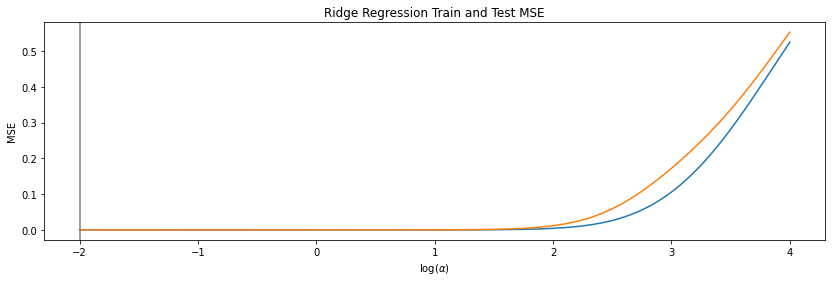

In [55]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('ridge_regression_train_test_MSE.png')

In [58]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [59]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.columns))),
                     index=ridge_alphas, columns=X_train.columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

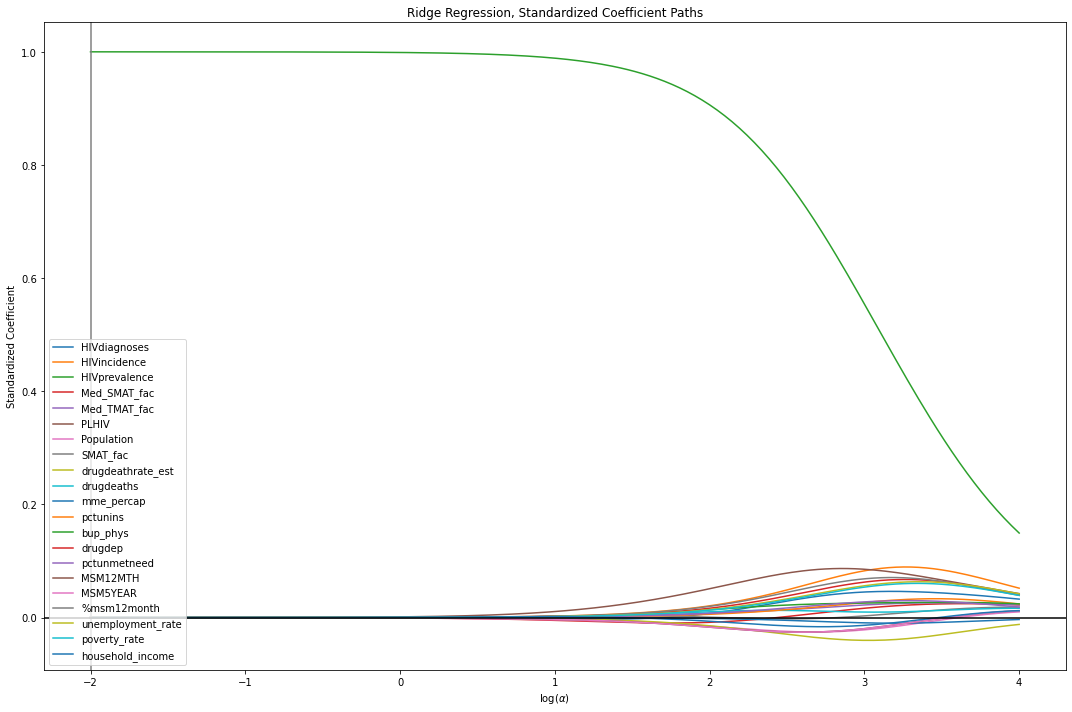

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))

for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.axhline(0,color = 'k')
ax.legend(loc='lower left')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
plt.tight_layout()
#plt.savefig('images/ridge_regression_standard_coefficient_paths.png')

In [61]:
df_train_coef = pd.DataFrame(paths, columns=X_train.columns, index=np.log10(ridge_alphas))
df_train_coef

,HIVdiagnoses,HIVincidence,HIVprevalence,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SMAT_fac,drugdeathrate_est,drugdeaths,mme_percap,pctunins,bup_phys,drugdep,pctunmetneed,MSM12MTH,MSM5YEAR,%msm12month,unemployment_rate,poverty_rate,household_income
-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print(np.log10(ridge_optimal_alpha))
#paths.iloc[226]
paths.iloc[200]

0.891566265060241


PLHIV                0.308214
Population          -0.054076
SMAT_fac             0.033609
drugdeathrate_est   -0.114253
drugdeaths           0.046573
mme_percap          -0.017129
pctunins             0.067060
bup_phys             0.098530
drugdep              0.163082
pctunmetneed         0.071058
MSM12MTH            -0.059478
MSM5YEAR            -0.059479
%msm12month          0.202153
unemployment_rate    0.144609
poverty_rate         0.140186
household_income    -0.026400
Name: 659.5946257418746, dtype: float64

In [69]:
lasso_alphas = np.logspace(-10, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Lasso, lasso_alphas, max_iter=10000)

In [70]:
lasso_cv_errors_test.shape

(10, 250)

Text(0, 0.5, 'MSE')

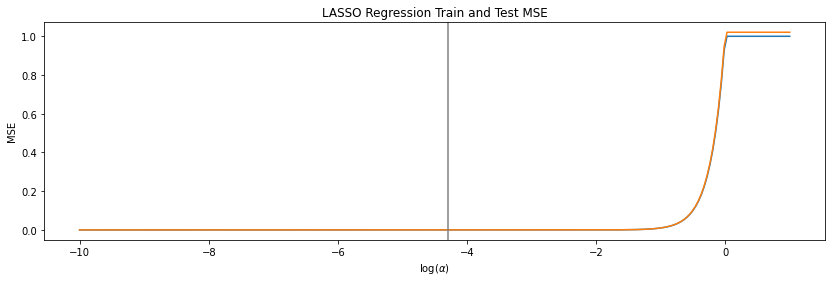

In [71]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('images/LASSO_regression_train_and_test_MSE.png')

In [65]:
lasso_models = []

for alpha in lasso_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_std, y_train_std)
    lasso_models.append(lasso)

Text(0, 0.5, 'Standardized Coefficient')

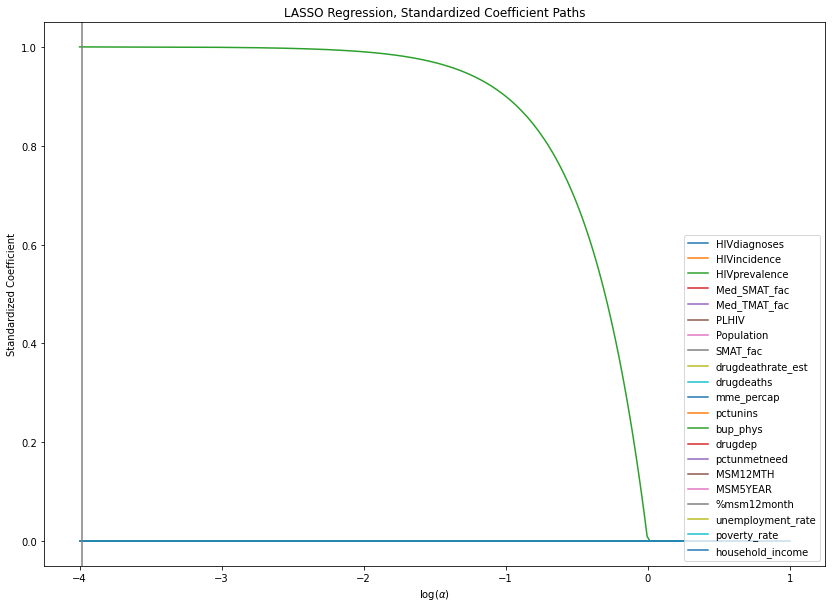

In [66]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.columns))),
                     index=lasso_alphas, columns=X_train.columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(14, 10))
for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
#plt.savefig('images/LASSO_regression_standardized_coefficient_paths.png')

In [67]:
lasso_optimal_alpha

0.00010473222288188944

In [68]:
paths.iloc[48]

HIVdiagnoses         0.00000
HIVincidence         0.00000
HIVprevalence        0.99908
Med_SMAT_fac         0.00000
Med_TMAT_fac         0.00000
PLHIV                0.00000
Population           0.00000
SMAT_fac             0.00000
drugdeathrate_est   -0.00000
drugdeaths           0.00000
mme_percap          -0.00000
pctunins             0.00000
bup_phys             0.00000
drugdep              0.00000
pctunmetneed         0.00000
MSM12MTH             0.00000
MSM5YEAR             0.00000
%msm12month          0.00000
unemployment_rate    0.00000
poverty_rate         0.00000
household_income     0.00000
Name: 0.000920143201528384, dtype: float64

In [37]:
standardizer = XyScaler()
standardizer.fit(X_train.iloc[:,5:].values, y_train.values)
X_train_std, y_train_std = standardizer.transform(X_train.iloc[:,5:].values, y_train.values)
X_test_std, y_test_std = standardizer.transform(X_test.iloc[:,5:].values, y_test.values)

In [38]:
final_ridge = Ridge(alpha=ridge_optimal_alpha).fit(X_train_std, y_train_std)
final_lasso = Lasso(alpha=lasso_optimal_alpha).fit(X_train_std, y_train_std)
final_lr = LinearRegression().fit(X_train_std, y_train_std)

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2714144624421806, tolerance: 0.2202
  positive)


In [88]:
final_ridge_rss = rss(y_test_std, final_ridge.predict(X_test_std))
final_lasso_rss = rss(y_test_std, final_lasso.predict(X_test_std))
final_lr_rss = rss(y_test_std, final_lr.predict(X_test_std))

In [89]:
print("Final Ridge RSS: {:2.3f}".format(final_ridge_rss))
print("Final Lasso RSS: {:2.3f}".format(final_lasso_rss))
print("Final Linear Regression RSS: {:2.3f}".format(final_lr_rss))

Final Ridge RSS: 0.633
Final Lasso RSS: 0.516
Final Linear Regression RSS: 0.517


In [90]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train.iloc[:,5:])
res = model.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          HIVprevalence   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              194.5
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:27:35   Log-Likelihood:                         -13758.
No. Observations:                2202   AIC:                                  2.758e+04
Df Residuals:                    2169   BIC:                                  2.777e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------